# get coordinates of any one city

In [1]:
from geopy.geocoders import Nominatim
import random
import string
import pandas as pd

In [2]:
def get_random_string(length):
    # choose from all lowercase letter
    letters = string.ascii_lowercase
    result_str = ''.join(random.choice(letters) for i in range(length))
    return result_str

In [3]:
name = get_random_string(length=4)
loc = Nominatim(user_agent=name)
city_name = 'Leiden'
getLoc = loc.geocode(city_name)
print('latitude:', getLoc.latitude)
print('longitude:', getLoc.longitude)

latitude: 52.1518157
longitude: 4.4811088666204295


# world map

In [4]:
import plotly.express as px
import numpy as np

In [5]:
df = px.data.gapminder().query('year==2007')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [6]:
# get coordinates of country
def get_lat(city_name):
    name = get_random_string(length=4)
    loc = Nominatim(user_agent=name)
    getLoc = loc.geocode(city_name)
    if getLoc is None:
        return np.nan
    else:        
        lat = getLoc.latitude
    #     lon = getLoc.longitude
        return lat#, lon

def get_lon(city_name):
    name = get_random_string(length=4)
    loc = Nominatim(user_agent=name)
    getLoc = loc.geocode(city_name)
    if getLoc is None:
        return np.nan
    else:   
    #lat = getLoc.latitude
        lon = getLoc.longitude
        return lon

In [7]:
df['lat']  = df['country'].apply(get_lat)

In [8]:
df['lon']  = df['country'].apply(get_lon)

In [9]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,lat,lon
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,33.768006,66.238514
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,41.000028,19.999962
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12,28.000027,2.999983
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24,-11.877577,17.569124
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,-34.996496,-64.967282


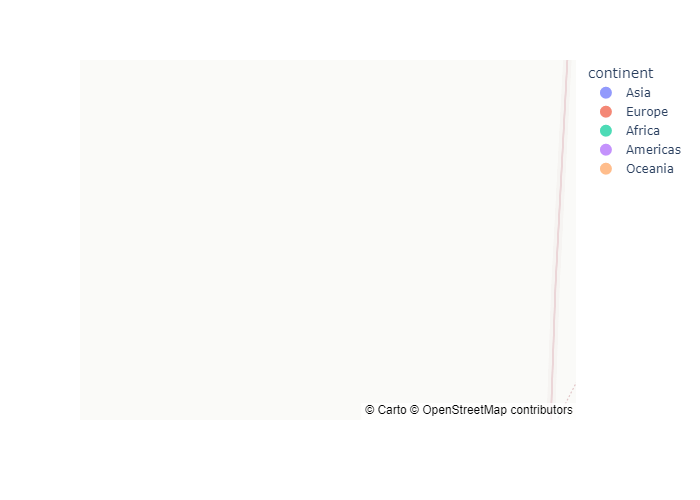

In [11]:
# plotly
fig = px.scatter_mapbox(df,
                     lat='lat',
                     lon='lon',
                     size='pop',
                     color='continent',
                     hover_name='lifeExp'
                     )
fig.update_layout(mapbox_style="carto-positron")
#fig.show()
#fig.write_html('world_map.html')
fig.show("png")